<a href="https://colab.research.google.com/github/vimalkumarasamy/Algorithms_Stanford_University_Coursera/blob/master/Shortest%20Paths%20Revisited%2C%20NP-Complete%20Problems%20and%20What%20To%20Do%20About%20Them/Travelling_Salesman_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import numpy as np
from itertools import combinations 
import copy
import pprint as pp
def dist(d1,d2):
  return ((d1[0]-d2[0])**2 + (d1[1]-d2[1]) **2)**0.5

filename ='gdrive/My Drive/Algorithms/tsp.txt'
header=False
v=0
coords={}
for f in open(filename):
  if not header:
    n=int(f)
    header=True
  else:
    f=f.replace('\n','').split(" ")
    coords[v]=[float(f[0]),float(f[1])]
    v=v+1

dist_matrix=np.zeros([v,v])
for i in range(v):
  for j in range(v):
    dist_matrix[i,j]=dist(coords[i],coords[j])


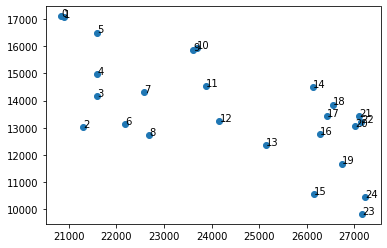

In [47]:
import pandas as pd
coords_pd=pd.DataFrame.from_dict(coords,orient='index')
import matplotlib.pyplot as plt
x=coords_pd[0].tolist()
y=coords_pd[1].tolist()
n = list(range(len(x)))

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

In [0]:
# Lets make this into 2 graphs
# between 0 and 12 
# between 11 and 25 
# compute the individual lengths and subtract 11 to 12 length twice as it
# 13

set_1=[coords[i] for i in range(13)]
dist_1=np.zeros([len(set_1),len(set_1)])
for i in range(len(set_1)):
  for j in range(len(set_1)):
    dist_1[i,j]=dist(set_1[i],set_1[j])

set_2=[coords[i] for i in range(11,25)]
dist_2=np.zeros([len(set_2),len(set_2)])
for i in range(len(set_2)):
  for j in range(len(set_2)):
    dist_2[i,j]=dist(set_2[i],set_2[j])



In [0]:
def shortest_path(coords):
    
  # coords=[[0,1,15,6],[2,0,7,3],[9,6,0,12],[10,4,8,0]]
  coords=np.array(coords)
  s=0
  n=len(coords[0])
  A=np.zeros([n,n]).tolist()
  for i in range(n):
    for j in range(n):
      A[i][j]={}
  for i in range(n):
    if i==s:
      A[s][s]['_']=0
    else: 
      A[i][0]['_']=coords[s][i]
  for i in range(1,n-1):
    print(i,"length route complete")
    nodes=list(range(n))
    nodes.remove(s)
    combs=combinations(nodes,i)
    combs=[list(i) for i in combs]
    for comb in combs:
      for j in nodes:
        if j not in comb:
          if len(comb)<2:
            A[j][i]['_'+str(comb[0])+'_']=float(A[comb[0]][i-1]['_']+coords[comb[0],j])
          else:
            val=np.inf
            for x in range(len(comb)):
              residual=copy.deepcopy(comb)
              y=residual.pop(x)
              key='_'
              keys=[]
              for k in residual:
                key=key+str(k)+'_'
                keys=keys+[k]
              if val>float(A[y][i-1][key]+coords[y,j]):
                val=float(A[y][i-1][key]+coords[y,j])
                key_final=key
                keys_final=keys
                y_final=y
            key=keys_final+[y_final]
            key.sort()
            # print(key)
            emp='_'
            for k in key:
              emp=emp+str(k)+'_'
            # A[j][i]['_'+str(y_final)+key_final]=val
            A[j][i][emp]=val

  # for i in range(len(A)):
  #   print(A[i])


  dist=np.inf
  for i in range(n):
    if A[i][n-2]!={} and i!=s:
      for j in A[i][n-2].keys():
        if dist>(A[i][n-2][j])+coords[i][s]:
          dist=(A[i][n-2][j])+coords[i][s]

  # print(dist)
  return(dist)

In [65]:
print("First graph")
c1=shortest_path(dist_1)
print("Second graph")
c2=shortest_path(dist_2)
# as the edge between node 11 and 12 got counted in both the small graphs, we need to subtract the same twice from the overall tour length
final=c1+c2-2*dist(coords[11],coords[12])
print("Overall tour cost")
print(int(final))

First graph
1 length route complete
2 length route complete
3 length route complete
4 length route complete
5 length route complete
6 length route complete
7 length route complete
8 length route complete
9 length route complete
10 length route complete
11 length route complete
Second graph
1 length route complete
2 length route complete
3 length route complete
4 length route complete
5 length route complete
6 length route complete
7 length route complete
8 length route complete
9 length route complete
10 length route complete
11 length route complete
12 length route complete
Overall tour cost
26442


In [0]:
# Implementing on a sample network from https://www.youtube.com/watch?v=-JjA4BLQyqE
coords=[[0,1,15,6],[2,0,7,3],[9,6,0,12],[10,4,8,0]]
coords=np.array(coords)
s=2
n=len(coords[0])
A=np.zeros([n,n]).tolist()
for i in range(n):
  for j in range(n):
    A[i][j]={}
for i in range(n):
  if i==s:
    A[s][s]['_']=0
  else: 
    A[i][0]['_']=coords[s][i]
for i in range(1,n-1):
  nodes=list(range(n))
  nodes.remove(s)
  combs=combinations(nodes,i)
  combs=[list(i) for i in combs]
  for comb in combs:
    for j in nodes:
      if j not in comb:
        if len(comb)<2:
          A[j][i]['_'+str(comb[0])+'_']=float(A[comb[0]][i-1]['_']+coords[comb[0],j])
        else:
          val=np.inf
          for x in range(len(comb)):
            residual=copy.deepcopy(comb)
            y=residual.pop(x)
            key='_'
            keys=[]
            for k in residual:
              key=key+str(k)+'_'
              keys=keys+[k]
            if val>float(A[y][i-1][key]+coords[y,j]):
              val=float(A[y][i-1][key]+coords[y,j])
              key_final=key
              keys_final=keys
              y_final=y
          key=keys_final+[y_final]
          key.sort()
          # print(key)
          emp='_'
          for k in key:
            emp=emp+str(k)+'_'
          # A[j][i]['_'+str(y_final)+key_final]=val
          A[j][i][emp]=val

for i in range(len(A)):
  print(A[i])


dist=np.inf
for i in range(n):
  # print(A[i][n-2])
  if A[i][n-2]!={} and i!=s:
    for j in A[i][n-2].keys():
      if dist>A[i][n-2][j]+coords[i][s]:
        dist=A[i][n-2][j]+coords[i][s]

print(dist)
        